In [60]:
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
from collections import OrderedDict
from functools import partial
from random import shuffle
import matplotlib.pyplot as plt
import os
import re
from keras.models import Model, load_model
from tensorflow.keras import Model, Input, regularizers, utils
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import re
import string
import json
from time import time
import pickle
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from tqdm import tqdm

In [62]:
from keras.applications.vgg19 import VGG19
# model = VGG19()
model = VGG19(weights="imagenet",input_shape=(224,224,3))
print(model.summary())

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [63]:
model.layers[12].output

<KerasTensor: shape=(None, 28, 28, 512) dtype=float32 (created by layer 'block4_conv1')>

In [64]:
model_new = Model(model.input, model.layers[12].output)

In [65]:
model_new.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [66]:
import glob
face_images = glob.glob('E:/Download/AniGAN-main/face2anime/human-faces/' + "*.*")
anime_images = glob.glob('E:/Download/AniGAN-main/face2anime/anime-faces/' + "*.*")

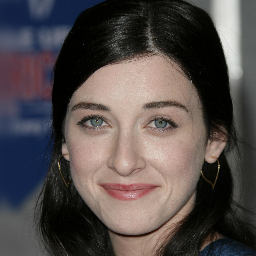

In [67]:
from tensorflow.keras import Model, Input, regularizers, utils
img_human = utils.load_img(face_images[0])
img_human

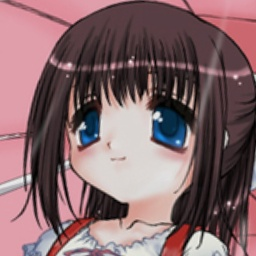

In [68]:
img_anime = utils.load_img(anime_images[0])
img_anime

In [69]:
all_images_anime = []
all_images_human = []

for i in tqdm(face_images):
    img = utils.load_img(i, target_size=(224,224,3))
    img = utils.img_to_array(img)
    
#     print("Before - ", img.shape)
    img = np.expand_dims(img,axis=0)
#     print("After - ", img.shape)
    
    all_images_human.append(img)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 95.72it/s]


In [70]:
for i in tqdm(anime_images):
    img = utils.load_img(i, target_size=(224,224,3))
    img = utils.img_to_array(img)
    
#     print("Before - ", img.shape)
    img = np.expand_dims(img,axis=0)
#     print("After - ", img.shape)
    all_images_anime.append(img)

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 209.15it/s]


In [71]:
def encode_image(img):
    feature_vector = model_new.predict(img)
    
#     feature_vector = feature_vector.reshape((-1,))
    print(feature_vector.shape)
    return feature_vector

In [72]:
start_time = time()
encoding_human =[]

for ix,img in enumerate(all_images_human):
    encoding_human.append(encode_image(img))
    print("Encoding in Progress Time step %d "%ix)

# encoding_human = model_new.predict(all_images_human)

end_time = time()
print("Total Time Taken :",end_time-start_time)

1/1 [==============================] - 0s 132ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 0 
1/1 [==============================] - 0s 83ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 1 
1/1 [==============================] - 0s 81ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 2 
1/1 [==============================] - 0s 85ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 3 
1/1 [==============================] - 0s 86ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 4 
1/1 [==============================] - 0s 86ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 5 
1/1 [==============================] - 0s 87ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 6 
1/1 [==============================] - 0s 86ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 7 
1/1 [==============================] - 0s 89ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 8 
1/1 [==============================] - 0s 88ms/step
(1, 28, 28, 512)
Enc

1/1 [==============================] - 0s 86ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 79 
1/1 [==============================] - 0s 85ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 80 
1/1 [==============================] - 0s 107ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 81 
1/1 [==============================] - 0s 93ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 82 
1/1 [==============================] - 0s 91ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 83 
1/1 [==============================] - 0s 97ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 84 
1/1 [==============================] - 0s 89ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 85 
1/1 [==============================] - 0s 86ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 86 
1/1 [==============================] - 0s 87ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 87 
1/1 [==============================] - 0s 84ms/step
(1, 28, 28,

In [73]:
!mkdir saved

A subdirectory or file saved already exists.


In [74]:
with open("saved/encoded_human_features.pkl","wb") as f:
    pickle.dump(encoding_human,f)

In [75]:
start_time = time()
encoding_anime =[]

for ix,img in enumerate(all_images_anime):
    encoding_anime.append(encode_image(img))
    print("Encoding in Progress Time step %d "%ix)

end_time = time()
print("Total Time Taken :",end_time-start_time)

1/1 [==============================] - 0s 82ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 0 
1/1 [==============================] - 0s 82ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 1 
1/1 [==============================] - 0s 84ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 2 
1/1 [==============================] - 0s 92ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 3 
1/1 [==============================] - 0s 89ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 4 
1/1 [==============================] - 0s 89ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 5 
1/1 [==============================] - 0s 87ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 6 
1/1 [==============================] - 0s 90ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 7 
1/1 [==============================] - 0s 88ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 8 
1/1 [==============================] - 0s 90ms/step
(1, 28, 28, 512)
Enco

1/1 [==============================] - 0s 97ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 79 
1/1 [==============================] - 0s 105ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 80 
1/1 [==============================] - 0s 95ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 81 
1/1 [==============================] - 0s 89ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 82 
1/1 [==============================] - 0s 93ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 83 
1/1 [==============================] - 0s 90ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 84 
1/1 [==============================] - 0s 92ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 85 
1/1 [==============================] - 0s 99ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 86 
1/1 [==============================] - 0s 104ms/step
(1, 28, 28, 512)
Encoding in Progress Time step 87 
1/1 [==============================] - 0s 98ms/step
(1, 28, 28

In [76]:
with open("saved/encoded_anime_features.pkl","wb") as f:
    pickle.dump(encoding_anime,f)

In [77]:
print(encoding_anime[0])
print(encoding_anime[0].shape)

[[[[   0.       1695.193       0.       ...  859.3678    295.0196
       0.      ]
   [   0.       2626.6355   1764.6787   ...  649.84973     0.
       0.      ]
   [1280.5396   2789.6614   1977.011    ...  930.39325     0.
       0.      ]
   ...
   [   0.        133.33232     0.       ...    0.          0.
       0.      ]
   [   0.        471.6353      0.       ...    0.          0.
       0.      ]
   [ 543.12744   577.315    1135.5707   ...  289.73505   351.74118
       0.      ]]

  [[1310.142     847.9838   1135.1982   ... 1037.1882   2285.4944
     912.95056 ]
   [   0.       1428.5614   4482.9634   ...  258.154    2430.6692
     109.33724 ]
   [ 630.89185  2251.1238   4873.8354   ...   45.868572 1503.7262
     131.62524 ]
   ...
   [   0.       1393.8186   2470.3298   ...    0.       1348.2482
       0.      ]
   [   0.       2209.4233   2950.992    ...  834.59094  1539.8208
       0.      ]
   [2586.1687   2103.6382   4186.8706   ... 1807.6403   2045.1193
       0.      ]]

 

In [78]:
def get_mean_std(x, epsilon=1e-5):

    # Compute the mean and standard deviation of a tensor.
    mean = np.mean(x)
    standard_deviation = np.std(x)
    return mean, standard_deviation

In [79]:
def ada_in(style, content):
    """Computes the AdaIn feature map.

    Args:
        style: The style feature map.
        content: The content feature map.

    Returns:
        The AdaIN feature map.
    """
    content_mean, content_std = get_mean_std(content)
    style_mean, style_std = get_mean_std(style)
    t = style_std * (content - content_mean) / content_std + style_mean
    return t

In [80]:
#example
res = ada_in(encoding_anime[0], encoding_human[0])
# print(res)
print(res.shape)
print(res[0].shape)

(1, 28, 28, 512)
(28, 28, 512)


In [81]:
#decoder part

In [82]:
x0 = Input(shape = (28, 28, 512))
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x0)
x2 = UpSampling2D((2, 2))(x1)

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
x4 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
x5 = Conv2D(256, (3, 3), activation='relu', padding='same')(x4)
x6 = Conv2D(128, (3, 3), activation='relu', padding='same')(x5)
x7 = UpSampling2D((2, 2))(x6)

x8 = Conv2D(128, (3, 3), activation='relu', padding='same')(x7)
x9 = Conv2D(64, (3, 3), activation='relu', padding='same')(x8)
x10 = UpSampling2D((2, 2))(x9)

x11 = Conv2D(64, (3, 3), activation='relu', padding='same')(x10)
x12 = Conv2D(3, (3, 3), activation='relu', padding='same')(x11)

In [83]:
decoder = Model(x0, x12)
decoder.compile(optimizer='adam', loss='mse')
decoder

In [84]:
print(decoder.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 512)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 256)       1179904   
                                                                 
 up_sampling2d_3 (UpSampling  (None, 56, 56, 256)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 256)       590080    
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 256)       590080    
                                                                 
 conv2d_12 (Conv2D)          (None, 56, 56, 256)       590080    
                                                           

In [85]:
print(encoding_anime[0].shape)
print(res.shape)
print(all_images_anime[0].shape)
decoder.fit(res, all_images_anime[0], epochs=10)

(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 224, 224, 3)
Epoch 1/10
1/1 [==============================] - 1s 993ms/step - loss: 10773.4824
Epoch 2/10
1/1 [==============================] - 1s 523ms/step - loss: 11652894.0000
Epoch 3/10
1/1 [==============================] - 1s 543ms/step - loss: 15206.5205
Epoch 4/10
1/1 [==============================] - 1s 502ms/step - loss: 14060.5361
Epoch 5/10
1/1 [==============================] - 0s 482ms/step - loss: 16664.9727
Epoch 6/10
1/1 [==============================] - 1s 523ms/step - loss: 12355.1465
Epoch 7/10
1/1 [==============================] - 1s 508ms/step - loss: 15829.5654
Epoch 8/10
1/1 [==============================] - 1s 509ms/step - loss: 614373.9375
Epoch 9/10
1/1 [==============================] - 1s 515ms/step - loss: 12931.9463
Epoch 10/10
1/1 [==============================] - 1s 531ms/step - loss: 17697.4922


In [86]:
predictions = decoder.predict(res)
print(predictions.shape)

1/1 [==============================] - 0s 144ms/step
(1, 224, 224, 3)


In [88]:
# tmp = predictions[0]
# print(tmp.shape)
# img = utils.array_to_img(tmp)
# plt.imshow(img)
# plt.show()

In [89]:
start_time = time()
encoding_combined = []

for ix,img in enumerate(encoding_anime):
    encoding_combined.append(ada_in(encoding_anime[ix], encoding_human[ix]))
    print("Encoding in Progress Time step %d "%ix)

end_time = time()
print("Total Time Taken :",end_time-start_time)

Encoding in Progress Time step 0 
Encoding in Progress Time step 1 
Encoding in Progress Time step 2 
Encoding in Progress Time step 3 
Encoding in Progress Time step 4 
Encoding in Progress Time step 5 
Encoding in Progress Time step 6 
Encoding in Progress Time step 7 
Encoding in Progress Time step 8 
Encoding in Progress Time step 9 
Encoding in Progress Time step 10 
Encoding in Progress Time step 11 
Encoding in Progress Time step 12 
Encoding in Progress Time step 13 
Encoding in Progress Time step 14 
Encoding in Progress Time step 15 
Encoding in Progress Time step 16 
Encoding in Progress Time step 17 
Encoding in Progress Time step 18 
Encoding in Progress Time step 19 
Encoding in Progress Time step 20 
Encoding in Progress Time step 21 
Encoding in Progress Time step 22 
Encoding in Progress Time step 23 
Encoding in Progress Time step 24 
Encoding in Progress Time step 25 
Encoding in Progress Time step 26 
Encoding in Progress Time step 27 
Encoding in Progress Time step

In [90]:
# encoding_list = list(encoding_combined.values())
desired_ans = []
for i in tqdm(all_images_anime):
    desired_ans.append(i[0])
#     print(i.shape)
#     print(i[0].shape)

desired_ans[0].shape
all_images_anime[0].shape

100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?it/s]


(1, 224, 224, 3)

In [91]:
# print(len(encoding_list))
print(len(desired_ans))
# encoding_list[0].shape

100


In [92]:
#Problem in this part.
#unable to fit somehow....
# we are directly predicting the results without fitting the data...
# as a result the results are random images.

start_time = time()

for ind,img in enumerate(encoding_combined):
    print("Encoding in Progress Time step %d "%ind)
    decoder.fit(encoding_combined[ind], all_images_anime[ind], epochs=10)


end_time = time()
print("Total Time Taken :",end_time-start_time)


Encoding in Progress Time step 0 
Epoch 1/10
1/1 [==============================] - 1s 520ms/step - loss: 17736.4746
Epoch 2/10
1/1 [==============================] - 1s 542ms/step - loss: 17745.9160
Epoch 3/10
1/1 [==============================] - 1s 570ms/step - loss: 17751.0391
Epoch 4/10
1/1 [==============================] - 1s 524ms/step - loss: 17754.2930
Epoch 5/10
1/1 [==============================] - 0s 481ms/step - loss: 17755.2344
Epoch 6/10
1/1 [==============================] - 0s 499ms/step - loss: 17755.3770
Epoch 7/10
1/1 [==============================] - 0s 474ms/step - loss: 17752.6445
Epoch 8/10
1/1 [==============================] - 1s 543ms/step - loss: 17746.0312
Epoch 9/10
1/1 [==============================] - 0s 488ms/step - loss: 17736.0586
Epoch 10/10
1/1 [==============================] - 0s 481ms/step - loss: 17724.5938
Encoding in Progress Time step 1 
Epoch 1/10
1/1 [==============================] - 1s 520ms/step - loss: 29983.3164
Epoch 2/10
1/1 [==

1/1 [==============================] - 1s 518ms/step - loss: 22377.0664
Epoch 6/10
1/1 [==============================] - 1s 564ms/step - loss: 14665.5928
Epoch 7/10
1/1 [==============================] - 1s 561ms/step - loss: 27410.8477
Epoch 8/10
1/1 [==============================] - 1s 512ms/step - loss: 17729.6992
Epoch 9/10
1/1 [==============================] - 1s 507ms/step - loss: 19984.2148
Epoch 10/10
1/1 [==============================] - 0s 495ms/step - loss: 20562.3184
Encoding in Progress Time step 10 
Epoch 1/10
1/1 [==============================] - 0s 483ms/step - loss: 13040.6572
Epoch 2/10
1/1 [==============================] - 0s 497ms/step - loss: 15460.9785
Epoch 3/10
1/1 [==============================] - 1s 545ms/step - loss: 12876.4365
Epoch 4/10
1/1 [==============================] - 1s 527ms/step - loss: 13559.4619
Epoch 5/10
1/1 [==============================] - 1s 513ms/step - loss: 13556.6172
Epoch 6/10
1/1 [==============================] - 1s 513ms/ste

Epoch 10/10
1/1 [==============================] - 1s 515ms/step - loss: 10514.0605
Encoding in Progress Time step 19 
Epoch 1/10
1/1 [==============================] - 0s 485ms/step - loss: 10646.7070
Epoch 2/10
1/1 [==============================] - 1s 521ms/step - loss: 10359.3867
Epoch 3/10
1/1 [==============================] - 1s 530ms/step - loss: 10045.5889
Epoch 4/10
1/1 [==============================] - 1s 526ms/step - loss: 11589.5293
Epoch 5/10
1/1 [==============================] - 1s 530ms/step - loss: 11897.6074
Epoch 6/10
1/1 [==============================] - 1s 528ms/step - loss: 12495.8213
Epoch 7/10
1/1 [==============================] - 1s 535ms/step - loss: 11467.4160
Epoch 8/10
1/1 [==============================] - 1s 521ms/step - loss: 11084.6680
Epoch 9/10
1/1 [==============================] - 1s 518ms/step - loss: 12255.1279
Epoch 10/10
1/1 [==============================] - 1s 528ms/step - loss: 11782.4590
Encoding in Progress Time step 20 
Epoch 1/10
1/1 

1/1 [==============================] - 1s 528ms/step - loss: 5241.1914
Epoch 6/10
1/1 [==============================] - 1s 517ms/step - loss: 4251.1958
Epoch 7/10
1/1 [==============================] - 1s 536ms/step - loss: 7114.3965
Epoch 8/10
1/1 [==============================] - 1s 520ms/step - loss: 5145.9819
Epoch 9/10
1/1 [==============================] - 1s 526ms/step - loss: 3776.8928
Epoch 10/10
1/1 [==============================] - 1s 523ms/step - loss: 4839.9243
Encoding in Progress Time step 29 
Epoch 1/10
1/1 [==============================] - 1s 500ms/step - loss: 7633.9194
Epoch 2/10
1/1 [==============================] - 1s 523ms/step - loss: 6959.9326
Epoch 3/10
1/1 [==============================] - 1s 533ms/step - loss: 6811.9644
Epoch 4/10
1/1 [==============================] - 1s 513ms/step - loss: 6949.9775
Epoch 5/10
1/1 [==============================] - 1s 520ms/step - loss: 6916.9653
Epoch 6/10
1/1 [==============================] - 1s 525ms/step - loss: 6

Encoding in Progress Time step 38 
Epoch 1/10
1/1 [==============================] - 0s 480ms/step - loss: 26826.9023
Epoch 2/10
1/1 [==============================] - 1s 512ms/step - loss: 27826.1582
Epoch 3/10
1/1 [==============================] - 1s 521ms/step - loss: 27842.0273
Epoch 4/10
1/1 [==============================] - 1s 513ms/step - loss: 25631.8164
Epoch 5/10
1/1 [==============================] - 1s 524ms/step - loss: 18201.8281
Epoch 6/10
1/1 [==============================] - 1s 508ms/step - loss: 43053.9609
Epoch 7/10
1/1 [==============================] - 1s 514ms/step - loss: 19114.9473
Epoch 8/10
1/1 [==============================] - 1s 522ms/step - loss: 20038.3633
Epoch 9/10
1/1 [==============================] - 1s 545ms/step - loss: 16546.3516
Epoch 10/10
1/1 [==============================] - 1s 509ms/step - loss: 18065.0020
Encoding in Progress Time step 39 
Epoch 1/10
1/1 [==============================] - 1s 527ms/step - loss: 13945.2246
Epoch 2/10
1/1 [

1/1 [==============================] - 1s 571ms/step - loss: 10142.0625
Epoch 6/10
1/1 [==============================] - 1s 593ms/step - loss: 10111.7949
Epoch 7/10
1/1 [==============================] - 1s 555ms/step - loss: 10028.6318
Epoch 8/10
1/1 [==============================] - 1s 547ms/step - loss: 9985.6182
Epoch 9/10
1/1 [==============================] - 1s 552ms/step - loss: 9911.5449
Epoch 10/10
1/1 [==============================] - 1s 533ms/step - loss: 9861.3047
Encoding in Progress Time step 48 
Epoch 1/10
1/1 [==============================] - 1s 609ms/step - loss: 14273.7217
Epoch 2/10
1/1 [==============================] - 1s 554ms/step - loss: 12212.4297
Epoch 3/10
1/1 [==============================] - 1s 526ms/step - loss: 13970.8828
Epoch 4/10
1/1 [==============================] - 1s 566ms/step - loss: 12244.0176
Epoch 5/10
1/1 [==============================] - 1s 508ms/step - loss: 12448.8301
Epoch 6/10
1/1 [==============================] - 1s 533ms/step -

1/1 [==============================] - 1s 515ms/step - loss: 13733.8750
Encoding in Progress Time step 57 
Epoch 1/10
1/1 [==============================] - 1s 516ms/step - loss: 12932.1250
Epoch 2/10
1/1 [==============================] - 0s 494ms/step - loss: 13219.1992
Epoch 3/10
1/1 [==============================] - 1s 517ms/step - loss: 13221.5293
Epoch 4/10
1/1 [==============================] - 1s 502ms/step - loss: 12943.4209
Epoch 5/10
1/1 [==============================] - 1s 528ms/step - loss: 12515.5635
Epoch 6/10
1/1 [==============================] - 1s 501ms/step - loss: 12130.2324
Epoch 7/10
1/1 [==============================] - 1s 519ms/step - loss: 11953.0430
Epoch 8/10
1/1 [==============================] - 1s 519ms/step - loss: 11922.0752
Epoch 9/10
1/1 [==============================] - 1s 504ms/step - loss: 11797.1836
Epoch 10/10
1/1 [==============================] - 1s 530ms/step - loss: 11526.8945
Encoding in Progress Time step 58 
Epoch 1/10
1/1 [===========

1/1 [==============================] - 1s 513ms/step - loss: 15348.8369
Epoch 5/10
1/1 [==============================] - 1s 534ms/step - loss: 13631.2090
Epoch 6/10
1/1 [==============================] - 1s 520ms/step - loss: 13415.3174
Epoch 7/10
1/1 [==============================] - 1s 526ms/step - loss: 13592.8750
Epoch 8/10
1/1 [==============================] - 1s 530ms/step - loss: 13541.6328
Epoch 9/10
1/1 [==============================] - 1s 527ms/step - loss: 13304.1699
Epoch 10/10
1/1 [==============================] - 1s 525ms/step - loss: 13153.3301
Encoding in Progress Time step 67 
Epoch 1/10
1/1 [==============================] - 1s 507ms/step - loss: 12092.9385
Epoch 2/10
1/1 [==============================] - 1s 543ms/step - loss: 9850.4600
Epoch 3/10
1/1 [==============================] - 1s 501ms/step - loss: 8608.8027
Epoch 4/10
1/1 [==============================] - 1s 535ms/step - loss: 9074.5068
Epoch 5/10
1/1 [==============================] - 1s 514ms/step -

1/1 [==============================] - 1s 541ms/step - loss: 16931.3516
Epoch 10/10
1/1 [==============================] - 1s 526ms/step - loss: 16790.8828
Encoding in Progress Time step 76 
Epoch 1/10
1/1 [==============================] - 1s 508ms/step - loss: 23047.7246
Epoch 2/10
1/1 [==============================] - 1s 527ms/step - loss: 21384.1191
Epoch 3/10
1/1 [==============================] - 1s 537ms/step - loss: 20226.6973
Epoch 4/10
1/1 [==============================] - 1s 534ms/step - loss: 20197.0996
Epoch 5/10
1/1 [==============================] - 1s 536ms/step - loss: 19963.6426
Epoch 6/10
1/1 [==============================] - 1s 561ms/step - loss: 19924.5762
Epoch 7/10
1/1 [==============================] - 1s 532ms/step - loss: 19999.8008
Epoch 8/10
1/1 [==============================] - 1s 537ms/step - loss: 19904.7148
Epoch 9/10
1/1 [==============================] - 1s 516ms/step - loss: 19821.4453
Epoch 10/10
1/1 [==============================] - 1s 545ms/st

1/1 [==============================] - 1s 518ms/step - loss: 11551.5576
Epoch 4/10
1/1 [==============================] - 1s 526ms/step - loss: 11459.6455
Epoch 5/10
1/1 [==============================] - 1s 537ms/step - loss: 11420.0176
Epoch 6/10
1/1 [==============================] - 1s 537ms/step - loss: 11418.2324
Epoch 7/10
1/1 [==============================] - 1s 537ms/step - loss: 11382.5195
Epoch 8/10
1/1 [==============================] - 1s 522ms/step - loss: 11318.3135
Epoch 9/10
1/1 [==============================] - 1s 536ms/step - loss: 11318.1943
Epoch 10/10
1/1 [==============================] - 1s 527ms/step - loss: 11291.5859
Encoding in Progress Time step 86 
Epoch 1/10
1/1 [==============================] - 1s 517ms/step - loss: 15387.4307
Epoch 2/10
1/1 [==============================] - 1s 555ms/step - loss: 14299.6992
Epoch 3/10
1/1 [==============================] - 1s 543ms/step - loss: 14093.3008
Epoch 4/10
1/1 [==============================] - 1s 557ms/ste

1/1 [==============================] - 1s 519ms/step - loss: 14831.2324
Epoch 9/10
1/1 [==============================] - 1s 557ms/step - loss: 13723.2930
Epoch 10/10
1/1 [==============================] - 1s 531ms/step - loss: 13119.5762
Encoding in Progress Time step 95 
Epoch 1/10
1/1 [==============================] - 1s 521ms/step - loss: 12929.1992
Epoch 2/10
1/1 [==============================] - 1s 545ms/step - loss: 12432.9199
Epoch 3/10
1/1 [==============================] - 1s 536ms/step - loss: 13077.9453
Epoch 4/10
1/1 [==============================] - 1s 545ms/step - loss: 13332.9844
Epoch 5/10
1/1 [==============================] - 1s 534ms/step - loss: 12548.5303
Epoch 6/10
1/1 [==============================] - 1s 532ms/step - loss: 12198.6055
Epoch 7/10
1/1 [==============================] - 1s 524ms/step - loss: 12559.6016
Epoch 8/10
1/1 [==============================] - 1s 551ms/step - loss: 12654.7236
Epoch 9/10
1/1 [==============================] - 1s 519ms/ste

In [93]:
# predictions = decoder.predict(encoding_combined)

predictions = []
for i in tqdm(encoding_combined):
    predictions.append(decoder.predict(i))

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 125ms/step


  1%|▊                                                                                 | 1/100 [00:00<00:15,  6.44it/s]

1/1 [==============================] - 0s 124ms/step


  2%|█▋                                                                                | 2/100 [00:00<00:15,  6.29it/s]

1/1 [==============================] - 0s 121ms/step


  3%|██▍                                                                               | 3/100 [00:00<00:15,  6.41it/s]

1/1 [==============================] - 0s 118ms/step


  4%|███▎                                                                              | 4/100 [00:00<00:14,  6.56it/s]

1/1 [==============================] - 0s 123ms/step


  5%|████                                                                              | 5/100 [00:00<00:14,  6.56it/s]

1/1 [==============================] - 0s 119ms/step


  6%|████▉                                                                             | 6/100 [00:00<00:14,  6.59it/s]

1/1 [==============================] - 0s 127ms/step


  7%|█████▋                                                                            | 7/100 [00:01<00:14,  6.52it/s]

1/1 [==============================] - 0s 120ms/step


  8%|██████▌                                                                           | 8/100 [00:01<00:13,  6.59it/s]

1/1 [==============================] - 0s 121ms/step


  9%|███████▍                                                                          | 9/100 [00:01<00:13,  6.52it/s]

1/1 [==============================] - 0s 125ms/step


 10%|████████                                                                         | 10/100 [00:01<00:13,  6.49it/s]

1/1 [==============================] - 0s 115ms/step


 11%|████████▉                                                                        | 11/100 [00:01<00:13,  6.62it/s]

1/1 [==============================] - 0s 125ms/step


 12%|█████████▋                                                                       | 12/100 [00:01<00:13,  6.58it/s]

1/1 [==============================] - 0s 121ms/step


 13%|██████████▌                                                                      | 13/100 [00:01<00:13,  6.65it/s]

1/1 [==============================] - 0s 119ms/step


 14%|███████████▎                                                                     | 14/100 [00:02<00:12,  6.69it/s]

1/1 [==============================] - 0s 135ms/step


 15%|████████████▏                                                                    | 15/100 [00:02<00:13,  6.42it/s]

1/1 [==============================] - 0s 144ms/step


 16%|████████████▉                                                                    | 16/100 [00:02<00:13,  6.15it/s]

1/1 [==============================] - 0s 148ms/step


 17%|█████████████▊                                                                   | 17/100 [00:02<00:13,  6.00it/s]

1/1 [==============================] - 0s 128ms/step


 18%|██████████████▌                                                                  | 18/100 [00:02<00:13,  6.06it/s]

1/1 [==============================] - 0s 123ms/step


 19%|███████████████▍                                                                 | 19/100 [00:02<00:12,  6.24it/s]

1/1 [==============================] - 0s 118ms/step


 20%|████████████████▏                                                                | 20/100 [00:03<00:12,  6.39it/s]

1/1 [==============================] - 0s 122ms/step


 21%|█████████████████                                                                | 21/100 [00:03<00:12,  6.50it/s]

1/1 [==============================] - 0s 117ms/step


 22%|█████████████████▊                                                               | 22/100 [00:03<00:11,  6.63it/s]

1/1 [==============================] - 0s 120ms/step


 23%|██████████████████▋                                                              | 23/100 [00:03<00:11,  6.66it/s]

1/1 [==============================] - 0s 134ms/step


 24%|███████████████████▍                                                             | 24/100 [00:03<00:11,  6.49it/s]

1/1 [==============================] - 0s 140ms/step


 25%|████████████████████▎                                                            | 25/100 [00:03<00:11,  6.28it/s]

1/1 [==============================] - 0s 121ms/step


 26%|█████████████████████                                                            | 26/100 [00:04<00:11,  6.39it/s]

1/1 [==============================] - 0s 119ms/step


 27%|█████████████████████▊                                                           | 27/100 [00:04<00:11,  6.50it/s]

1/1 [==============================] - 0s 119ms/step


 28%|██████████████████████▋                                                          | 28/100 [00:04<00:10,  6.55it/s]

1/1 [==============================] - 0s 119ms/step


 29%|███████████████████████▍                                                         | 29/100 [00:04<00:10,  6.62it/s]

1/1 [==============================] - 0s 122ms/step


 30%|████████████████████████▎                                                        | 30/100 [00:04<00:10,  6.63it/s]

1/1 [==============================] - 0s 123ms/step


 31%|█████████████████████████                                                        | 31/100 [00:04<00:10,  6.65it/s]

1/1 [==============================] - 0s 118ms/step


 32%|█████████████████████████▉                                                       | 32/100 [00:04<00:10,  6.71it/s]

1/1 [==============================] - 0s 119ms/step


 33%|██████████████████████████▋                                                      | 33/100 [00:05<00:09,  6.74it/s]

1/1 [==============================] - 0s 119ms/step


 34%|███████████████████████████▌                                                     | 34/100 [00:05<00:09,  6.75it/s]

1/1 [==============================] - 0s 120ms/step


 35%|████████████████████████████▎                                                    | 35/100 [00:05<00:09,  6.77it/s]

1/1 [==============================] - 0s 129ms/step


 36%|█████████████████████████████▏                                                   | 36/100 [00:05<00:09,  6.62it/s]

1/1 [==============================] - 0s 130ms/step


 37%|█████████████████████████████▉                                                   | 37/100 [00:05<00:09,  6.51it/s]

1/1 [==============================] - 0s 126ms/step


 38%|██████████████████████████████▊                                                  | 38/100 [00:05<00:09,  6.41it/s]

1/1 [==============================] - 0s 117ms/step


 39%|███████████████████████████████▌                                                 | 39/100 [00:05<00:09,  6.56it/s]

1/1 [==============================] - 0s 133ms/step


 40%|████████████████████████████████▍                                                | 40/100 [00:06<00:09,  6.42it/s]

1/1 [==============================] - 0s 122ms/step


 41%|█████████████████████████████████▏                                               | 41/100 [00:06<00:09,  6.45it/s]

1/1 [==============================] - 0s 118ms/step


 42%|██████████████████████████████████                                               | 42/100 [00:06<00:08,  6.58it/s]

1/1 [==============================] - 0s 119ms/step


 43%|██████████████████████████████████▊                                              | 43/100 [00:06<00:08,  6.66it/s]

1/1 [==============================] - 0s 120ms/step


 44%|███████████████████████████████████▋                                             | 44/100 [00:06<00:08,  6.70it/s]

1/1 [==============================] - 0s 117ms/step


 45%|████████████████████████████████████▍                                            | 45/100 [00:06<00:08,  6.76it/s]

1/1 [==============================] - 0s 119ms/step


 46%|█████████████████████████████████████▎                                           | 46/100 [00:07<00:07,  6.77it/s]

1/1 [==============================] - 0s 117ms/step


 47%|██████████████████████████████████████                                           | 47/100 [00:07<00:07,  6.76it/s]

1/1 [==============================] - 0s 118ms/step


 48%|██████████████████████████████████████▉                                          | 48/100 [00:07<00:07,  6.80it/s]

1/1 [==============================] - 0s 115ms/step


 49%|███████████████████████████████████████▋                                         | 49/100 [00:07<00:07,  6.87it/s]

1/1 [==============================] - 0s 116ms/step


 50%|████████████████████████████████████████▌                                        | 50/100 [00:07<00:07,  6.89it/s]

1/1 [==============================] - 0s 117ms/step


 51%|█████████████████████████████████████████▎                                       | 51/100 [00:07<00:07,  6.91it/s]

1/1 [==============================] - 0s 117ms/step


 52%|██████████████████████████████████████████                                       | 52/100 [00:07<00:06,  6.92it/s]

1/1 [==============================] - 0s 118ms/step


 53%|██████████████████████████████████████████▉                                      | 53/100 [00:08<00:06,  6.88it/s]

1/1 [==============================] - 0s 120ms/step


 54%|███████████████████████████████████████████▋                                     | 54/100 [00:08<00:06,  6.88it/s]

1/1 [==============================] - 0s 118ms/step


 55%|████████████████████████████████████████████▌                                    | 55/100 [00:08<00:06,  6.87it/s]

1/1 [==============================] - 0s 123ms/step


 56%|█████████████████████████████████████████████▎                                   | 56/100 [00:08<00:06,  6.77it/s]

1/1 [==============================] - 0s 123ms/step


 57%|██████████████████████████████████████████████▏                                  | 57/100 [00:08<00:06,  6.70it/s]

1/1 [==============================] - 0s 120ms/step


 58%|██████████████████████████████████████████████▉                                  | 58/100 [00:08<00:06,  6.74it/s]

1/1 [==============================] - 0s 120ms/step


 59%|███████████████████████████████████████████████▊                                 | 59/100 [00:08<00:06,  6.71it/s]

1/1 [==============================] - 0s 125ms/step


 60%|████████████████████████████████████████████████▌                                | 60/100 [00:09<00:06,  6.61it/s]

1/1 [==============================] - 0s 117ms/step


 61%|█████████████████████████████████████████████████▍                               | 61/100 [00:09<00:05,  6.68it/s]

1/1 [==============================] - 0s 125ms/step


 62%|██████████████████████████████████████████████████▏                              | 62/100 [00:09<00:05,  6.63it/s]

1/1 [==============================] - 0s 118ms/step


 63%|███████████████████████████████████████████████████                              | 63/100 [00:09<00:05,  6.71it/s]

1/1 [==============================] - 0s 140ms/step


 64%|███████████████████████████████████████████████████▊                             | 64/100 [00:09<00:05,  6.43it/s]

1/1 [==============================] - 0s 132ms/step


 65%|████████████████████████████████████████████████████▋                            | 65/100 [00:09<00:05,  6.34it/s]

1/1 [==============================] - 0s 121ms/step


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [00:10<00:05,  6.44it/s]

1/1 [==============================] - 0s 122ms/step


 67%|██████████████████████████████████████████████████████▎                          | 67/100 [00:10<00:05,  6.43it/s]

1/1 [==============================] - 0s 129ms/step


 68%|███████████████████████████████████████████████████████                          | 68/100 [00:10<00:04,  6.41it/s]

1/1 [==============================] - 0s 118ms/step


 69%|███████████████████████████████████████████████████████▉                         | 69/100 [00:10<00:04,  6.55it/s]

1/1 [==============================] - 0s 119ms/step


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [00:10<00:04,  6.64it/s]

1/1 [==============================] - 0s 123ms/step


 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [00:10<00:04,  6.62it/s]

1/1 [==============================] - 0s 118ms/step


 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [00:10<00:04,  6.72it/s]

1/1 [==============================] - 0s 126ms/step


 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [00:11<00:04,  6.62it/s]

1/1 [==============================] - 0s 118ms/step


 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [00:11<00:03,  6.69it/s]

1/1 [==============================] - 0s 136ms/step


 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [00:11<00:03,  6.47it/s]

1/1 [==============================] - 0s 137ms/step


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [00:11<00:03,  6.28it/s]

1/1 [==============================] - 0s 136ms/step


 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [00:11<00:03,  6.24it/s]

1/1 [==============================] - 0s 139ms/step


 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [00:11<00:03,  6.16it/s]

1/1 [==============================] - 0s 135ms/step


 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [00:12<00:03,  6.16it/s]

1/1 [==============================] - 0s 121ms/step


 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [00:12<00:03,  6.32it/s]

1/1 [==============================] - 0s 122ms/step


 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [00:12<00:02,  6.45it/s]

1/1 [==============================] - 0s 123ms/step


 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [00:12<00:02,  6.50it/s]

1/1 [==============================] - 0s 121ms/step


 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [00:12<00:02,  6.57it/s]

1/1 [==============================] - 0s 122ms/step


 84%|████████████████████████████████████████████████████████████████████             | 84/100 [00:12<00:02,  6.61it/s]

1/1 [==============================] - 0s 124ms/step


 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [00:12<00:02,  6.62it/s]

1/1 [==============================] - 0s 120ms/step


 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [00:13<00:02,  6.61it/s]

1/1 [==============================] - 0s 121ms/step


 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [00:13<00:01,  6.64it/s]

1/1 [==============================] - 0s 121ms/step


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [00:13<00:01,  6.65it/s]

1/1 [==============================] - 0s 120ms/step


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [00:13<00:01,  6.64it/s]

1/1 [==============================] - 0s 121ms/step


 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [00:13<00:01,  6.63it/s]

1/1 [==============================] - 0s 122ms/step


 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [00:13<00:01,  6.62it/s]

1/1 [==============================] - 0s 123ms/step


 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [00:14<00:01,  6.61it/s]

1/1 [==============================] - 0s 128ms/step


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [00:14<00:01,  6.54it/s]

1/1 [==============================] - 0s 119ms/step


 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [00:14<00:00,  6.58it/s]

1/1 [==============================] - 0s 123ms/step


 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [00:14<00:00,  6.60it/s]

1/1 [==============================] - 0s 121ms/step


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [00:14<00:00,  6.54it/s]

1/1 [==============================] - 0s 125ms/step


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [00:14<00:00,  6.49it/s]

1/1 [==============================] - 0s 119ms/step


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [00:14<00:00,  6.58it/s]

1/1 [==============================] - 0s 123ms/step


 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [00:15<00:00,  6.56it/s]

1/1 [==============================] - 0s 128ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.56it/s]


In [94]:
print(len(predictions))
print(predictions[0].shape)

100
(1, 224, 224, 3)


In [95]:
print(len(all_images_anime))
print(all_images_anime[0].shape)

100
(1, 224, 224, 3)


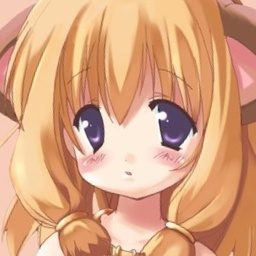

In [96]:
utils.load_img(anime_images[3])

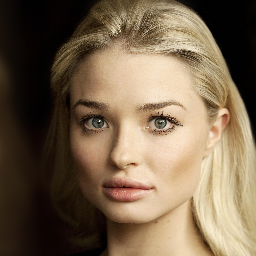

In [97]:
utils.load_img(face_images[3])

(224, 224, 3)


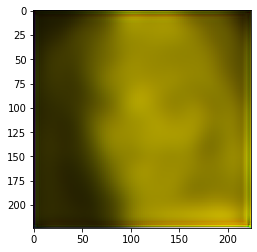

In [98]:
tmp = predictions[3][0]*255.0
print(tmp.shape)
img = utils.array_to_img(tmp)
plt.imshow(img)
plt.show()